In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
n_samples = 100
X1 = np.random.uniform(1, 10, n_samples)   # Feature 1
X2 = np.random.uniform(20, 80, n_samples)  # Feature 2
noise = np.random.normal(0, 5, n_samples)  # Random noise

# True relation: Target = 5 + 2*X1 + 0.5*X2 + noise
y = 5 + 2 * X1 + 0.5 * X2 + noise

# Create a DataFrame
data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})

print("✅ Synthetic dataset created successfully!")
data.head()

✅ Synthetic dataset created successfully!


,Feature1,Feature2,Target
0,1.745552,41.351967,28.625633
1,9.741737,27.006830,38.292255
2,8.787353,78.346867,57.139775
3,8.217884,30.763093,38.190512
4,6.313483,32.589881,27.442620


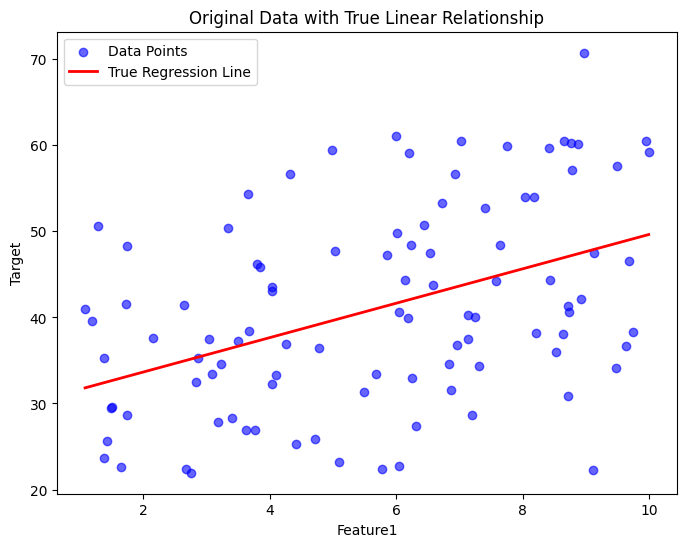

In [19]:
# STEP 2: PLOT ORIGINAL DATA + TRUE LINEAR RELATION (2D)

import matplotlib.pyplot as plt

# We'll visualize only one feature (Feature1) vs Target
plt.figure(figsize=(8,6))
plt.scatter(data['Feature1'], data['Target'], color='blue', alpha=0.6, label='Data Points')

# Sort Feature1 for a smooth line
x_sorted = np.sort(data['Feature1'])
# Compute true relationship line (using true formula from data generation)
y_true_line = 5 + 2 * x_sorted + 0.5 * np.mean(data['Feature2'])  # fixing Feature2 at mean

# Plot true regression line
plt.plot(x_sorted, y_true_line, color='red', linewidth=2, label='True Regression Line')

plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Original Data with True Linear Relationship')
plt.legend()
plt.show()


📈 Learned Coefficients (θ):
Bias: 0.301, Feature1: 2.153, Feature2: 0.574


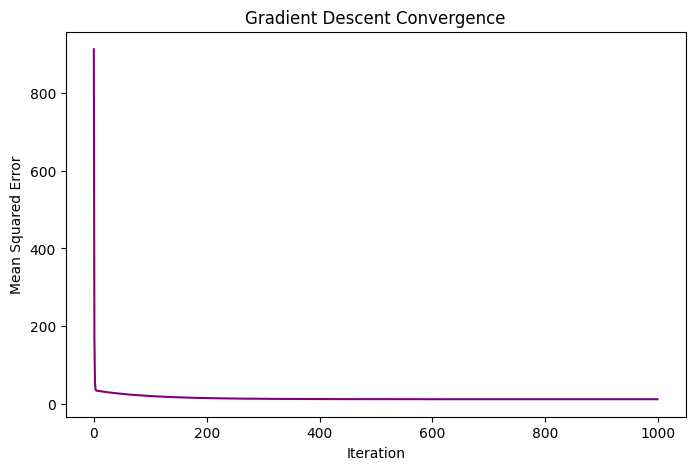

In [20]:
# STEP 3: GRADIENT DESCENT IMPLEMENTATION

# Prepare data
X = np.c_[np.ones(n_samples), data[['Feature1', 'Feature2']].values]  # add bias term
y_vec = data['Target'].values.reshape(-1, 1)

# Initialize coefficients (theta)
theta = np.zeros((X.shape[1], 1))

# Hyperparameters
alpha = 0.0005   # learning rate
iterations = 1000

# Store history for plotting
mse_history = []
theta_path = []

# Gradient Descent loop
m = len(y_vec)
for i in range(iterations):
    y_pred = X.dot(theta)
    error = y_pred - y_vec
    gradient = (1/m) * X.T.dot(error)
    theta -= alpha * gradient
    mse = (1/(2*m)) * np.sum(error**2)
    mse_history.append(mse)
    theta_path.append(theta.copy())

theta_path = np.array(theta_path).reshape(iterations, 3)

# Show final coefficients
print("📈 Learned Coefficients (θ):")
print(f"Bias: {theta[0][0]:.3f}, Feature1: {theta[1][0]:.3f}, Feature2: {theta[2][0]:.3f}")

# Plot convergence curve
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), mse_history, color='purple')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.show()


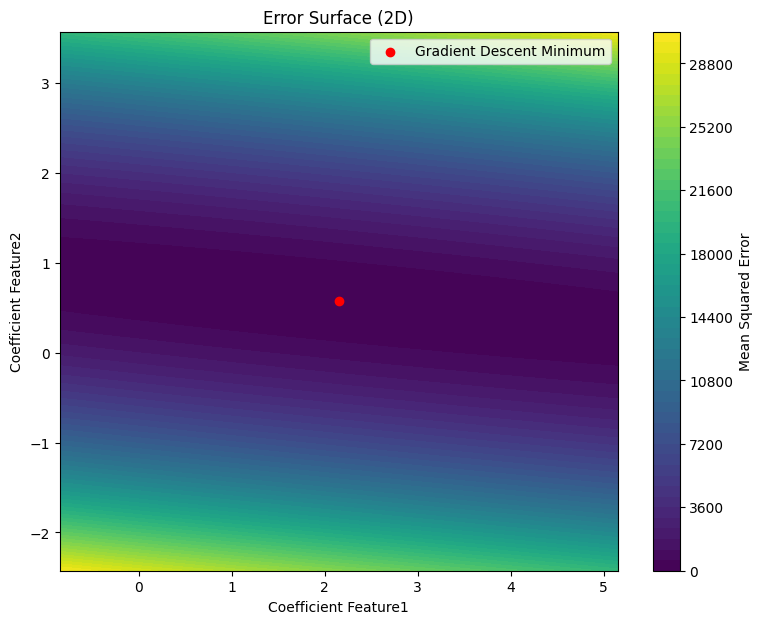

In [21]:
# STEP 4: 2D ERROR SURFACE PLOT

w1 = np.linspace(theta[1]-3, theta[1]+3, 100)
w2 = np.linspace(theta[2]-3, theta[2]+3, 100)
W1, W2 = np.meshgrid(w1, w2)
MSE = np.zeros_like(W1)

X_no_bias = data[['Feature1','Feature2']].values 

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        y_pred_grid = theta[0] + W1[i,j]*X_no_bias[:,0] + W2[i,j]*X_no_bias[:,1]
        MSE[i,j] = np.mean((data['Target'].values - y_pred_grid)**2)

plt.figure(figsize=(9, 7))
contour = plt.contourf(W1, W2, MSE, levels=50, cmap='viridis')
plt.colorbar(contour, label='Mean Squared Error')
plt.xlabel('Coefficient Feature1')
plt.ylabel('Coefficient Feature2')
plt.title('Error Surface (2D)')
plt.scatter(theta[1], theta[2], color='red', label='Gradient Descent Minimum')
plt.legend()
plt.show()


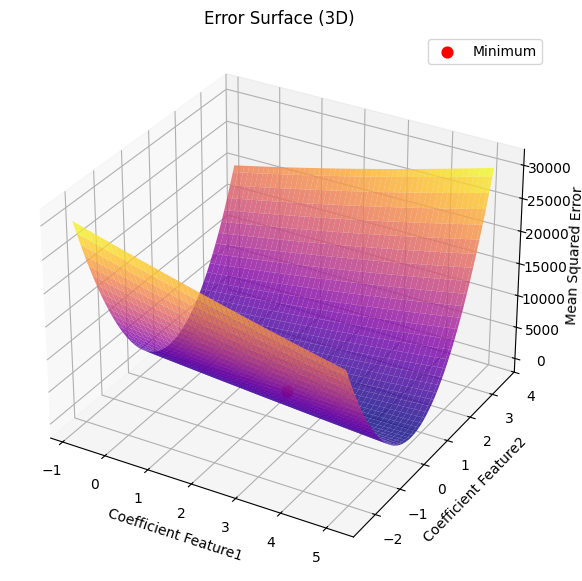

In [22]:
# STEP 5: 3D ERROR SURFACE PLOT

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, MSE, cmap='plasma', alpha=0.8)
ax.scatter(theta[1], theta[2], np.min(MSE), color='red', s=60, label='Minimum')

ax.set_xlabel('Coefficient Feature1')
ax.set_ylabel('Coefficient Feature2')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Error Surface (3D)')
plt.legend()
plt.show()
